# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed

In [15]:
import pandas as pd

file_path_medical = '/Users/rogerswartz/Library/CloudStorage/Dropbox/Mac (2)/Documents/GitHub/DataScienceGuidedCapstone/raw_data/insurance2.csv'

medical = pd.read_csv(file_path_medical)

In [17]:
medical.shape

(1338, 8)

In [19]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A: The issue is that we appear to have a skew right distribution or some kind of exponential distribution and we cannot understand
that from being given a mean or standard deviation. 

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

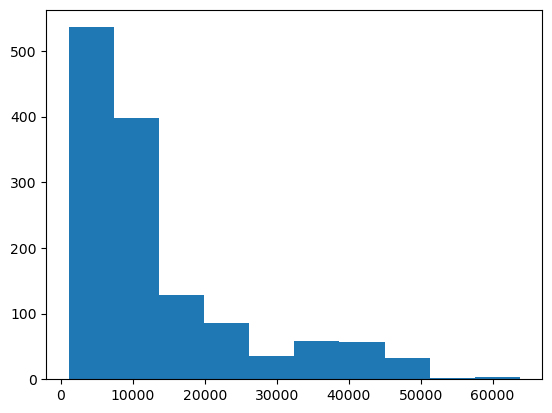

In [38]:
plt.hist(medical["charges"], bins=10)

(array([136., 106., 106.,  90.,  98.,  90.,  82.,  73.,  88.,  65.,  45.,
         17.,  19.,  20.,  28.,  20.,  22.,  13.,  19.,  12.,  11.,   9.,
          7.,   6.,   2.,   6.,  15.,  12.,  12.,  14.,  15.,  13.,  10.,
          7.,  12.,   8.,  11.,   8.,   4.,   1.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   2.]),
 array([ 1121.8739   ,  2374.8449822,  3627.8160644,  4880.7871466,
         6133.7582288,  7386.729311 ,  8639.7003932,  9892.6714754,
        11145.6425576, 12398.6136398, 13651.584722 , 14904.5558042,
        16157.5268864, 17410.4979686, 18663.4690508, 19916.440133 ,
        21169.4112152, 22422.3822974, 23675.3533796, 24928.3244618,
        26181.295544 , 27434.2666262, 28687.2377084, 29940.2087906,
        31193.1798728, 32446.150955 , 33699.1220372, 34952.0931194,
        36205.0642016, 37458.0352838, 38711.006366 , 39963.9774482,
        41216.9485304, 42469.9196126, 43722.8906948, 44975.861777 ,
        46228.8328592, 47481.8039414, 48734.77

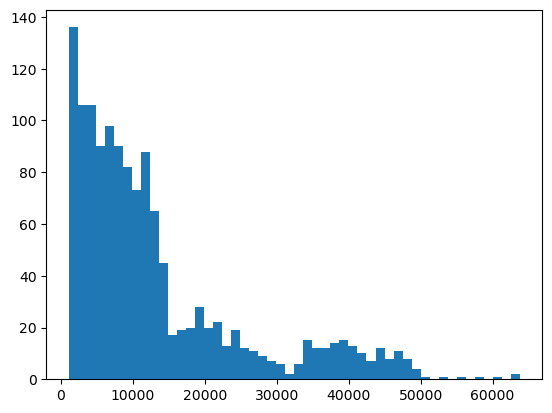

In [40]:
plt.hist(medical["charges"], bins=50)

In [ ]:
plt.hist(medical["charges"], bins=50)

(array([92., 51., 34., 25., 32., 47., 48., 46., 51., 40., 33.,  8., 13.,
        13., 17., 14., 16.,  8., 15.,  7.,  7.,  6.,  5.,  4.,  2.,  4.,
        15., 11., 10., 14., 15., 13., 10.,  7., 12.,  8., 11.,  8.,  4.,
         1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  2.]),
 array([ 1131.5066   ,  2384.2850282,  3637.0634564,  4889.8418846,
         6142.6203128,  7395.398741 ,  8648.1771692,  9900.9555974,
        11153.7340256, 12406.5124538, 13659.290882 , 14912.0693102,
        16164.8477384, 17417.6261666, 18670.4045948, 19923.183023 ,
        21175.9614512, 22428.7398794, 23681.5183076, 24934.2967358,
        26187.075164 , 27439.8535922, 28692.6320204, 29945.4104486,
        31198.1888768, 32450.967305 , 33703.7457332, 34956.5241614,
        36209.3025896, 37462.0810178, 38714.859446 , 39967.6378742,
        41220.4163024, 42473.1947306, 43725.9731588, 44978.751587 ,
        46231.5300152, 47484.3084434, 48737.0868716, 49989.8652998,
        51242.643728 , 52495.4221562

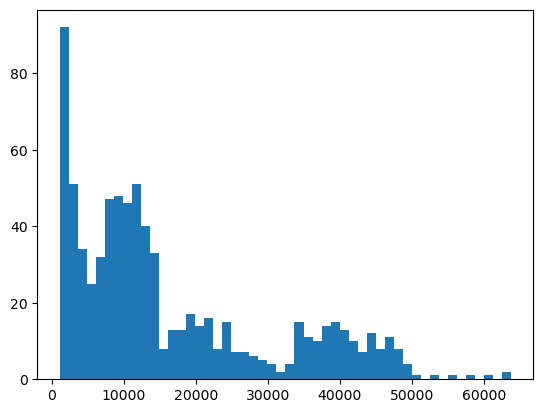

In [55]:
Insured_patient_Charges = medical[medical['insuranceclaim'] == 1]['charges']
plt.hist(Insured_patient_Charges, bins=50)

(array([234., 232.,  84.,  60.,  24.,  54.,  57.,  32.,   2.,   4.]),
 array([ 1131.5066  ,  7395.398741, 13659.290882, 19923.183023,
        26187.075164, 32450.967305, 38714.859446, 44978.751587,
        51242.643728, 57506.535869, 63770.42801 ]),
 <BarContainer object of 10 artists>)

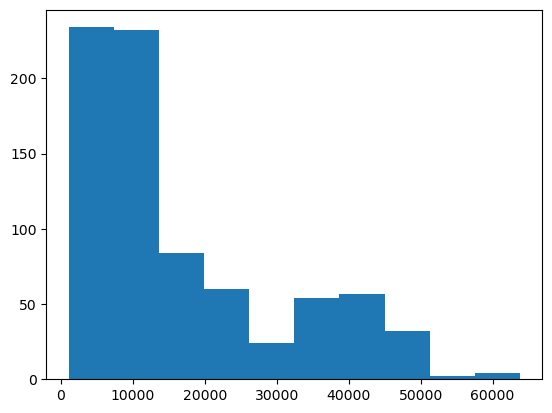

In [59]:
Insured_patient_Charges = medical[medical['insuranceclaim'] == 1]['charges']
plt.hist(Insured_patient_Charges, bins=10)

(array([26., 24., 28., 32., 47., 48., 31., 39., 33., 19., 29., 18., 20.,
        13., 21., 21., 14.,  8.,  9.,  4.,  5.,  4.,  2.,  6.,  6.,  6.,
         3.,  3.,  3.,  5.,  2.,  1.,  3.,  3.,  3.,  1.,  3.,  2.,  2.,
         1.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  2.]),
 array([ 1121.8739   ,  1837.6485826,  2553.4232652,  3269.1979478,
         3984.9726304,  4700.747313 ,  5416.5219956,  6132.2966782,
         6848.0713608,  7563.8460434,  8279.620726 ,  8995.3954086,
         9711.1700912, 10426.9447738, 11142.7194564, 11858.494139 ,
        12574.2688216, 13290.0435042, 14005.8181868, 14721.5928694,
        15437.367552 , 16153.1422346, 16868.9169172, 17584.6915998,
        18300.4662824, 19016.240965 , 19732.0156476, 20447.7903302,
        21163.5650128, 21879.3396954, 22595.114378 , 23310.8890606,
        24026.6637432, 24742.4384258, 25458.2131084, 26173.987791 ,
        26889.7624736, 27605.5371562, 28321.3118388, 29037.0865214,
        29752.861204 , 30468.6358866

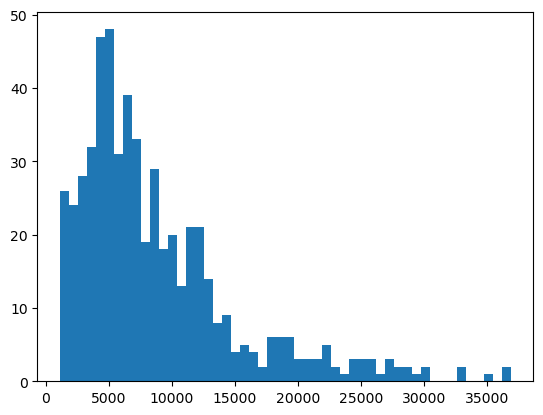

In [57]:
UnInsured_patient_Charges = medical[medical['insuranceclaim'] == 0]['charges']
plt.hist(UnInsured_patient_Charges, bins=50)

(array([157., 170., 101.,  56.,  23.,  20.,  12.,   9.,   4.,   3.]),
 array([ 1121.8739  ,  4700.747313,  8279.620726, 11858.494139,
        15437.367552, 19016.240965, 22595.114378, 26173.987791,
        29752.861204, 33331.734617, 36910.60803 ]),
 <BarContainer object of 10 artists>)

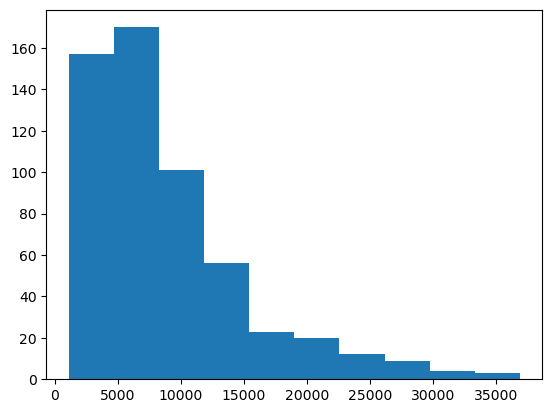

In [61]:
UnInsured_patient_Charges = medical[medical['insuranceclaim'] == 0]['charges']
plt.hist(UnInsured_patient_Charges, bins=10)

In [27]:
np.mean(medical["charges"])

13270.422265141257

In [29]:
np.std(medical["charges"])

12105.484975561605

(783,)

In [83]:
UnInsured_patient_Charges.shape

(555,)

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: Well not knowning much about the data at this time I would be thinking include:
1. First and foremost, the average claim is $13,270 although the standard deviation is high making it more likely that our degree of confidence that the mean falls in some tight range is likely lower.  There will be some degree of spread. 

On an additional note there are some other considerations such as:
2. What are the nature of each patients costs especially those that are pulling the average down. Maybe they are for lower cost hospital vists
3. There appear to be many lower cost visits lets look at the hospital's cost for those visits vs. what is collected from the insurance.
4. Our sample size of 1338 is large enough that we can be confident this is not a normal distribution
5. We appear to have a bimodal or even trimodal distribution
6. We might be interested in some of the higher charge visits and perhaps we might want some idea of what percentage of bills exceeded $40,000 and $50,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A: We would be interested in a one sided confidence interval since we need the cut off to be at $12000.
In other words:
Null Hypothesis: Mean is less than $12000
Alternative hypothesis: Mean is greater than $12000
Looking at the Z_Score and reading the table it suggests that if the distribution was normal there would be a 99.98% chance that the the mean is greater than 12000
Although the issue is that we likely have an exponential distribution since the standard deviation is almost the same as the mean
This kind of test is not ideal for an exponential distribution. 


In [46]:
#Standard Error
SE = np.std(medical["charges"])/(np.sqrt(1338))
print(SE)

330.943713906084


In [49]:
Z_Score = (np.mean(medical["charges"]) - 12000)/SE
print(Z_Score)

3.838786511901477


In [ ]:
#From the Z_Score the probability that the average charge for all patients is below $12000 is 0.02%.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:Null Hypothesis: Those with insurance are charged the same as those without insurance  
Alternative hypothesis: Those with insurance are not charged the same as those without insurance 

What is intereting here is not only that the uninsured patients have a mean that is 53.7% of the insured patients but also that their standard deviation is 45.9% of the insured.  Hypothetically speaking if we took the insured numbers and divided by 2 the standard deviation would be 50% of the original amount.  Thus, it is a possibility that unisured patients are paying less that insured for the same services, procedures, tests and medicines.  

The t test is used to determine if there is a statistically significant difference between the means of the two independent groups
We assume that the two groups have more or less equal variances but we can see that insured patients have a variance that is nearly 5 times greater than the uninsured patients.  Thus, this test is not exactly ideal.  We need a test that allows for a difference in variance.

We need to consider patients with the same services, procedures, tests and medicines insured vs uninsured. 

With a p-value of 2.0744433192791677e-31 that is less than the significance level of 0.05 or 0.025 we reject the null hypothesis. 


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [63]:
np.mean(Insured_patient_Charges)

16423.928276537677

In [65]:
np.mean(UnInsured_patient_Charges)

8821.421892306305

In [67]:
np.std(Insured_patient_Charges)

14036.956250260411

In [69]:
np.std(UnInsured_patient_Charges)

6440.699841605234

In [75]:
print((np.mean(UnInsured_patient_Charges))/(np.mean(Insured_patient_Charges)))

0.5371079161925046


In [77]:
print((np.std(UnInsured_patient_Charges))/(np.std(Insured_patient_Charges)))

0.4588387772089656


In [85]:
Insured_patient_Charges.shape

(783,)

In [87]:
UnInsured_patient_Charges.shape

(555,)

In [103]:
#Manual Calculation of the pooled standard deviation
pooled = ((  (783 - 1)*(14036**2) + (555 - 1)*(6440**2)  )/1336)**0.5
print(pooled)

11511.43807224006


In [105]:
#Manual Calculation of the t-test statistic above
t = (16423.9 - 8821.4)/(11511.4 * (((1/783) + (1/555))**0.5))
print(t)

11.90220975284029


In [115]:
#Calculation of the p value
p = t.sf(11.9, 1336)
print(p)

2.0744433192791677e-31


In [ ]:
help(scipy.stats)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A: We can use the CDF function: e.g. p-value = 1 - CDF(Z-Score)

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test